In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.1 MB/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import  RandomForestClassifier, ExtraTreesClassifier, StackingClassifier, ExtraTreesRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
#from pycaret.classification import *
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import PowerTransformer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_bank_data/train.csv')

<ipython-input-3-debe211ae6e4>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_bank_data/train.csv')


#Check Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
print(df.shape)
print(df.iloc[:,4:].isna().sum())

(100000, 28)
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [ ]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [ ]:
def get_unique_values(df):
    cat_cols = df.select_dtypes("object").columns

    data_info = np.zeros((len(cat_cols), 5), dtype="object")
    for i, col in enumerate(cat_cols):
        if len(df[col].unique()) > 5000:
            continue
        else:
            unique_values, counts = np.unique(
                np.array(df[col], dtype=str), return_counts=True)
            num_of_uv = len(unique_values)
            unique_val_percent = np.round(counts / counts.sum(), 2)
            data_info[i, :] = [col, unique_values.tolist(
            ), counts.tolist(), num_of_uv, unique_val_percent]
    return pd.DataFrame(data_info, columns=["column", "unique", "counts", "len_unique_values", "%_unique_values"])

In [ ]:
unique_values_data = get_unique_values(df)
unique_values_data

,column,unique,counts,len_unique_values,%_unique_values
0,0,0,0,0,0
1,0,0,0,0,0
2,Month,"[April, August, February, January, July, June,...","[12500, 12500, 12500, 12500, 12500, 12500, 125...",8,"[0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12]"
3,0,0,0,0,0
4,Age,"[-500, 100, 1004, 1006, 1010, 102, 1022, 1024,...","[886, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...",1788,"[0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,0,0,0,0,0
6,Occupation,"[Accountant, Architect, Developer, Doctor, Eng...","[6271, 6355, 6235, 6087, 6350, 6174, 6085, 657...",16,"[0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.0..."
7,0,0,0,0,0
8,Num_of_Loan,"[-100, 0, 0_, 1, 100, 1001, 1002, 1006, 1008, ...","[3876, 10380, 550, 10083, 1, 1, 1, 1, 1, 1, 1,...",434,"[0.04, 0.1, 0.01, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0..."
9,0,0,0,0,0


In [ ]:
df.loc[df['Credit_Mix'] == '_','Type_of_Loan']

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
10                                     Credit-Builder Loan
19                 Auto Loan, Auto Loan, and Not Specified
29                                           Not Specified
35                                                     NaN
                               ...                        
99988    Personal Loan, Auto Loan, Mortgage Loan, Stude...
99992                          Auto Loan, and Student Loan
99994                          Auto Loan, and Student Loan
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 20195, dtype: object

change _______ in Occupation to None

In [ ]:
df.loc[df['Occupation'] == '_______','Occupation']  = 'None'

remove special character

In [ ]:
def replace_special_character(text):
    if "NM" in str(text):
        return 'No'
    if "payments" in str(text) or "_" not in str(text):
        return text
    clean_text = str(text).replace("_", "")
    return np.nan if clean_text == "nan" else clean_text
df = df.applymap(replace_special_character)

drop na and mistake input

In [ ]:
def fill_na_in_column(col):
    return col.apply(lambda x: np.nan if x in ('', '!@9#%8','nan') else x)
# Apply the function to each column
df = df.apply(fill_na_in_column)
data = df.drop(['ID','Customer_ID','Month','Name','SSN'], axis = 1).dropna()
data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,28,None,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
12,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good


In [ ]:
data.shape

(42684, 23)

year and month


In [ ]:
#'22 Years and 9 Months' -> 273
data['Credit_History_Age'] = data['Credit_History_Age'].apply(lambda x : x.replace(" Months",'').split(' Years and '))

In [ ]:
data['Credit_History_Age'] = data['Credit_History_Age'].apply(lambda x : int(x[0])*12+int(x[1]))

In [ ]:
floatbutobj = ['Annual_Income','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
intbutobj = ['Age','Num_of_Loan','Num_of_Delayed_Payment']

In [ ]:
print('float')
for var in floatbutobj:
    print(var)
    data[var] = data[var].astype(float)
print('int')
for var in intbutobj:
    print(var)
    data[var] = data[var].astype(int)

float
Annual_Income
Changed_Credit_Limit
Outstanding_Debt
Amount_invested_monthly
Monthly_Balance
int
Age
Num_of_Loan
Num_of_Delayed_Payment


In [ ]:
data_numeric_and_object = data.copy()

#range of column data

In [ ]:
ls = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',]
for var in ls:
    print('-------------')
    print(var)
    print('Max :',max(data_numeric_and_object[var]))
    print('Min :',min(data_numeric_and_object[var]))
print('-------------')

-------------
Age
Max : 8682
Min : -500
-------------
Annual_Income
Max : 24198062.0
Min : 7005.93
-------------
Monthly_Inhand_Salary
Max : 15204.633333333331
Min : 303.6454166666666
-------------
Num_Bank_Accounts
Max : 1798
Min : -1
-------------
Num_Credit_Card
Max : 1499
Min : 0
-------------
Interest_Rate
Max : 5797
Min : 1
-------------
Num_of_Loan
Max : 1485
Min : -100
-------------
Delay_from_due_date
Max : 67
Min : -5
-------------
Num_of_Delayed_Payment
Max : 4397
Min : -3
-------------
Changed_Credit_Limit
Max : 36.29
Min : -6.44
-------------
Num_Credit_Inquiries
Max : 2594.0
Min : 0.0
-------------
Outstanding_Debt
Max : 4998.07
Min : 0.23
-------------
Credit_Utilization_Ratio
Max : 49.56451934738699
Min : 20.88125003902868
-------------
Credit_History_Age
Max : 404
Min : 1
-------------
Total_EMI_per_month
Max : 82331.0
Min : 4.4628374669131645
-------------
Amount_invested_monthly
Max : 10000.0
Min : 0.0
-------------
Monthly_Balance
Max : 1552.9460937445635
Min : -3.3

In [ ]:
#human max age = 125 | loan max age  < 70 and >18
#data_limit_range = data_numeric_and_object.drop(data_numeric_and_object[(data_numeric_and_object['Monthly_Balance']<0)|(data_numeric_and_object['Interest_Rate'] > 50 )|(data_numeric_and_object['Age'] < 0 )|(data_numeric_and_object['Age'] > 125  )|(data_numeric_and_object['Num_Bank_Accounts']<0)|(data_numeric_and_object['Delay_from_due_date']<0)|(data_numeric_and_object['Num_of_Loan']<0)|(data_numeric_and_object['Num_of_Delayed_Payment']<0)].index)
data_limit_range = data_numeric_and_object.drop(data_numeric_and_object[(data_numeric_and_object['Monthly_Balance']<0)|(data_numeric_and_object['Age'] < 0 )|(data_numeric_and_object['Age'] > 125  )|(data_numeric_and_object['Num_Bank_Accounts']<0)|(data_numeric_and_object['Delay_from_due_date']<0)|(data_numeric_and_object['Num_of_Loan']<0)|(data_numeric_and_object['Num_of_Delayed_Payment']<0)].index)

In [ ]:
ls = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',]
print(data_limit_range.shape)

for var in ls:
    print('-------------')
    print(var)
    print('Max :',max(data_limit_range[var]))
    print('Min :',min(data_limit_range[var]))
print('-------------')

(39434, 23)
-------------
Age
Max : 115
Min : 14
-------------
Annual_Income
Max : 24198062.0
Min : 7005.93
-------------
Monthly_Inhand_Salary
Max : 15204.633333333331
Min : 303.6454166666666
-------------
Num_Bank_Accounts
Max : 1798
Min : 0
-------------
Num_Credit_Card
Max : 1499
Min : 0
-------------
Interest_Rate
Max : 5797
Min : 1
-------------
Num_of_Loan
Max : 1485
Min : 1
-------------
Delay_from_due_date
Max : 67
Min : 0
-------------
Num_of_Delayed_Payment
Max : 4397
Min : 0
-------------
Changed_Credit_Limit
Max : 36.29
Min : -6.44
-------------
Num_Credit_Inquiries
Max : 2594.0
Min : 0.0
-------------
Outstanding_Debt
Max : 4998.07
Min : 0.23
-------------
Credit_Utilization_Ratio
Max : 49.56451934738699
Min : 20.88125003902868
-------------
Credit_History_Age
Max : 404
Min : 2
-------------
Total_EMI_per_month
Max : 82331.0
Min : 4.4628374669131645
-------------
Amount_invested_monthly
Max : 10000.0
Min : 0.0
-------------
Monthly_Balance
Max : 1552.9460937445635
Min : 0

#change outlier to median

In [ ]:
data_clear = data_limit_range.copy()
for var in data_clear.select_dtypes(exclude="object").columns:
    q1, q3 = np.quantile(data_clear[var], [0.25,0.75])
    iqr = q3 - q1
    lower_limit = q1 - (1.25 * iqr)
    upper_limit = q3 + (1.25 * iqr)
    med = np.median(data_clear[var])
    data_clear.loc[:,[var]][(data_clear[var]<lower_limit)&(data_clear[var]>upper_limit)] = med

In [ ]:
(data_clear != data_limit_range).sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

#object to numeric and clean

type of loan (str->list->one-hot encoding)

In [ ]:
data_clear_outlier = data_clear.copy()
type(data_clear_outlier.Type_of_Loan.iloc[0])

str

In [ ]:
data_clear_outlier.Type_of_Loan.replace('and', '', regex=True, inplace=True)
data_clear_outlier['Type_of_Loan'] = data_clear_outlier.Type_of_Loan.apply(lambda x: x.split(','))
(data_clear_outlier.Type_of_Loan.iloc[0],type(data_clear_outlier.Type_of_Loan.iloc[0]))

(['Auto Loan', ' Credit-Builder Loan', ' Personal Loan', '  Home Equity Loan'],
 list)

In [ ]:
data_clear_outlier = data_clear_outlier.copy().assign(Type_of_Loan=data_clear_outlier.Type_of_Loan.apply(lambda x: [i.strip() for i in x]))
data_clear_outlier

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,23,Scientist,19114.12,1824.843333,3,4,3,4,"[Auto Loan, Credit-Builder Loan, Personal Loan...",3,...,Good,809.98,22.537593,271,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
8,28,None,34847.84,3037.986667,2,4,6,1,[Credit-Builder Loan],3,...,Good,605.03,24.464031,319,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,28,Teacher,34847.84,3037.986667,2,4,6,1,[Credit-Builder Loan],7,...,Good,605.03,38.550848,320,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
12,28,Teacher,34847.84,3037.986667,2,4,6,1,[Credit-Builder Loan],3,...,Good,605.03,34.977895,323,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
13,28,Teacher,34847.84,3037.986667,2,4,6,1,[Credit-Builder Loan],3,...,Good,605.03,33.381010,324,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,28,Architect,20002.88,1929.906667,10,8,29,5,"[Personal Loan, Auto Loan, Mortgage Loan, Stud...",35,...,Bad,3571.70,22.895966,68,Yes,60.964772,43.370670,High_spent_Large_value_payments,328.655224,Poor
99985,28,Architect,20002.88,1929.906667,10,8,29,5,"[Personal Loan, Auto Loan, Mortgage Loan, Stud...",33,...,Bad,3571.70,39.772607,69,Yes,12112.000000,148.275233,Low_spent_Small_value_payments,273.750662,Poor
99986,28,Architect,20002.88,1929.906667,10,8,29,5,"[Personal Loan, Auto Loan, Mortgage Loan, Stud...",33,...,Bad,3571.70,24.713861,70,Yes,60.964772,76.282793,Low_spent_Small_value_payments,345.743101,Poor
99991,29,Architect,20002.88,1929.906667,10,8,29,5,"[Personal Loan, Auto Loan, Mortgage Loan, Stud...",33,...,Bad,3571.70,37.140784,75,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard


In [ ]:
data_clear_outlier = data_clear_outlier.drop('Type_of_Loan', 1).join(data_clear_outlier.Type_of_Loan.str.join('|').str.get_dummies().add_prefix('Type_of_Loan_'))
data_clear_outlier

<ipython-input-27-114a51701d5f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_clear_outlier = data_clear_outlier.drop('Type_of_Loan', 1).join(data_clear_outlier.Type_of_Loan.str.join('|').str.get_dummies().add_prefix('Type_of_Loan_'))


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Score,Type_of_Loan_Auto Loan,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Home Equity Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Not Specified,Type_of_Loan_Payday Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Student Loan
6,23,Scientist,19114.12,1824.843333,3,4,3,4,3,8,...,Good,1,1,0,1,0,0,0,1,0
8,28,None,34847.84,3037.986667,2,4,6,1,3,4,...,Standard,0,1,0,0,0,0,0,0,0
9,28,Teacher,34847.84,3037.986667,2,4,6,1,7,1,...,Good,0,1,0,0,0,0,0,0,0
12,28,Teacher,34847.84,3037.986667,2,4,6,1,3,1,...,Good,0,1,0,0,0,0,0,0,0
13,28,Teacher,34847.84,3037.986667,2,4,6,1,3,0,...,Good,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,28,Architect,20002.88,1929.906667,10,8,29,5,35,26,...,Poor,1,0,0,0,1,0,0,1,1
99985,28,Architect,20002.88,1929.906667,10,8,29,5,33,25,...,Poor,1,0,0,0,1,0,0,1,1
99986,28,Architect,20002.88,1929.906667,10,8,29,5,33,25,...,Poor,1,0,0,0,1,0,0,1,1
99991,29,Architect,20002.88,1929.906667,10,8,29,5,33,25,...,Standard,1,0,0,0,1,0,0,1,1


other dummies

In [ ]:
unique_values_data = get_unique_values(data_clear_outlier)
unique_values_data['column'].tolist()

['Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [ ]:
data_clear_outlier = pd.get_dummies(data_clear_outlier, columns=['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'])
data_clear_outlier.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
6,23,19114.12,1824.843333,3,4,3,4,3,8,11.27,...,1,0,1,0,0,0,0,0,0,1
8,28,34847.84,3037.986667,2,4,6,1,3,4,5.42,...,1,0,1,0,0,0,0,0,0,1
9,28,34847.84,3037.986667,2,4,6,1,7,1,7.42,...,1,0,1,0,1,0,0,0,0,0
12,28,34847.84,3037.986667,2,4,6,1,3,1,6.42,...,1,0,1,0,0,0,0,0,0,1
13,28,34847.84,3037.986667,2,4,6,1,3,0,5.42,...,1,0,1,0,1,0,0,0,0,0


Change categorical class to 0,1,2

In [ ]:
data_clear_outlier['Credit_Score'] = data_clear_outlier['Credit_Score'].replace({'Poor': 0, 'Standard': 1, 'Good': 2})

In [ ]:
data_full = data_clear_outlier.copy()

#EDA

In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39434 entries, 6 to 99997
Data columns (total 54 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 39434 non-null  int64  
 1   Annual_Income                                       39434 non-null  float64
 2   Monthly_Inhand_Salary                               39434 non-null  float64
 3   Num_Bank_Accounts                                   39434 non-null  int64  
 4   Num_Credit_Card                                     39434 non-null  int64  
 5   Interest_Rate                                       39434 non-null  int64  
 6   Num_of_Loan                                         39434 non-null  int64  
 7   Delay_from_due_date                                 39434 non-null  int64  
 8   Num_of_Delayed_Payment                              39434 non-null  int64  


In [ ]:
data_full['ratio_de_month'] = data_full['Total_EMI_per_month']/data_full['Monthly_Inhand_Salary']
data_full['ratio_invest_month'] = data_full['Amount_invested_monthly']/data_full['Monthly_Inhand_Salary']
data_full['total_loan_type']=data_full.iloc[:,18:26].sum(axis=1)

Check Distribution

Text(0.5, 1.0, 'Class Distributions')

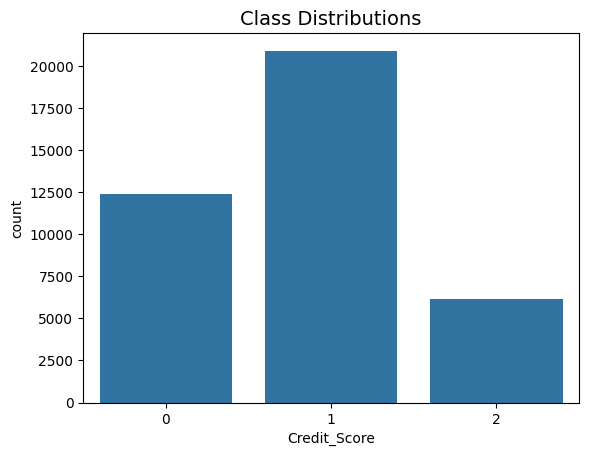

In [ ]:
sns.countplot(data_full, x="Credit_Score")
plt.title('Class Distributions', fontsize=14)

Check Correlation (numeric form)

Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

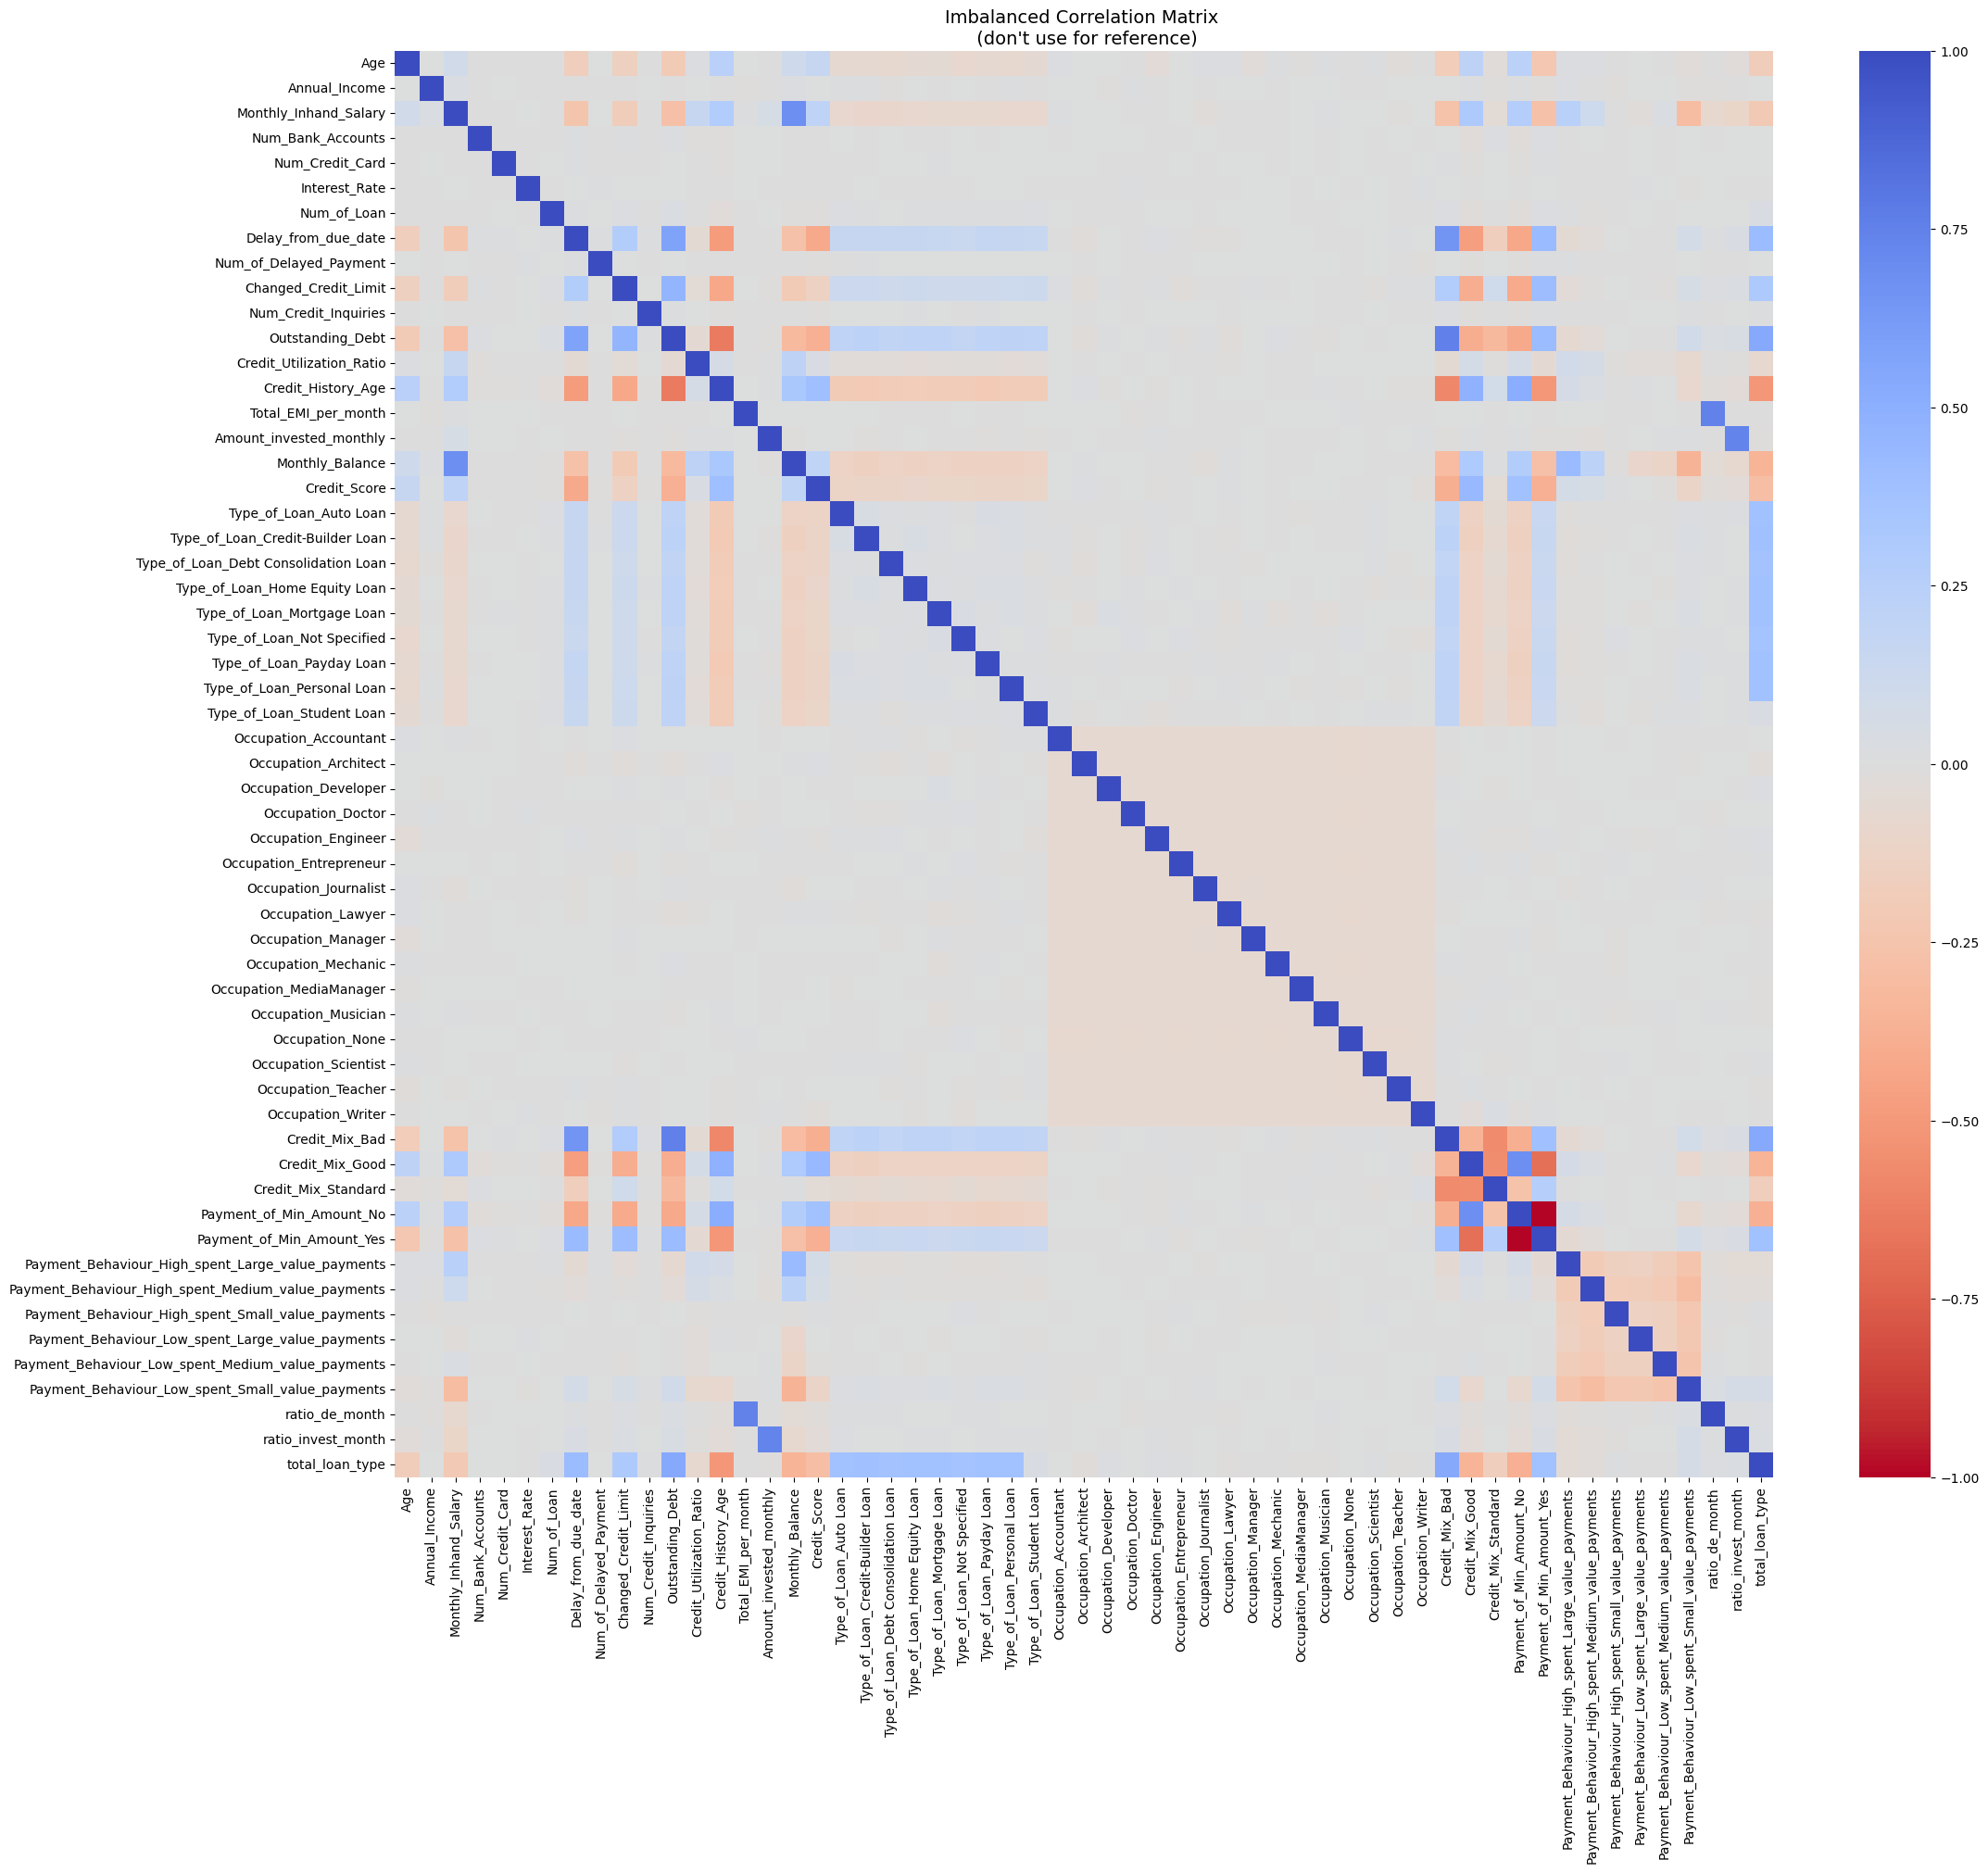

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = data_full.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

In [ ]:
data_full.corr()['Credit_Score'].apply(abs).sort_values().head()

Occupation_Accountant    0.000460
Occupation_Teacher       0.001084
Occupation_Doctor        0.001405
Occupation_Journalist    0.001903
Occupation_Developer     0.002564
Name: Credit_Score, dtype: float64

In [ ]:
data_full.corr()['Credit_Score'].apply(abs).sort_values().tail(10)

Monthly_Inhand_Salary        0.210458
total_loan_type              0.289292
Payment_of_Min_Amount_Yes    0.377434
Payment_of_Min_Amount_No     0.377434
Outstanding_Debt             0.378714
Credit_Mix_Bad               0.383474
Credit_History_Age           0.390852
Delay_from_due_date          0.421764
Credit_Mix_Good              0.431722
Credit_Score                 1.000000
Name: Credit_Score, dtype: float64

In [ ]:
high_cor_col = data_full.corr()['Credit_Score'][data_full.corr()['Credit_Score'].apply(abs)>0.1].index
print(data_full.corr()['Credit_Score'][data_full.corr()['Credit_Score'].apply(abs)>0.1])

Age                                                 0.159015
Monthly_Inhand_Salary                               0.210458
Delay_from_due_date                                -0.421764
Changed_Credit_Limit                               -0.147144
Outstanding_Debt                                   -0.378714
Credit_History_Age                                  0.390852
Monthly_Balance                                     0.201802
Credit_Score                                        1.000000
Type_of_Loan_Auto Loan                             -0.118522
Type_of_Loan_Credit-Builder Loan                   -0.110326
Type_of_Loan_Debt Consolidation Loan               -0.110673
Type_of_Loan_Home Equity Loan                      -0.101203
Type_of_Loan_Mortgage Loan                         -0.104718
Type_of_Loan_Not Specified                         -0.106437
Type_of_Loan_Payday Loan                           -0.112562
Type_of_Loan_Personal Loan                         -0.110826
Type_of_Loan_Student Loa

In [ ]:
low_cor_col = data_full.corr()['Credit_Score'][data_full.corr()['Credit_Score'].apply(abs)<=0.1].index
print(data_full.corr()['Credit_Score'][data_full.corr()['Credit_Score'].apply(abs)<=0.1])

Annual_Income                                         0.002691
Num_Bank_Accounts                                    -0.005839
Num_Credit_Card                                      -0.006916
Interest_Rate                                        -0.003881
Num_of_Loan                                          -0.009761
Num_of_Delayed_Payment                               -0.008996
Num_Credit_Inquiries                                 -0.011142
Credit_Utilization_Ratio                              0.038504
Total_EMI_per_month                                   0.003646
Amount_invested_monthly                               0.003659
Occupation_Accountant                                 0.000460
Occupation_Architect                                  0.016754
Occupation_Developer                                 -0.002564
Occupation_Doctor                                     0.001405
Occupation_Engineer                                  -0.009804
Occupation_Entrepreneur                              -0

Check correlation categroricl form

In [ ]:
from scipy.stats import chi2_contingency
def cramers_v(col):
    # Sample categorical feature and class
    feature = df[col]
    class_label = df['Credit_Score']

    # Create contingency table
    contingency_table = pd.crosstab(feature, class_label)

    # Calculate chi-square statistic and p-value
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print("Chi-square statistic:", chi2)
    print("P-value:", p)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    print(np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1))))
# Calculate Cramer's V
ls_cat_col =  ['Occupation','Type_of_Loan','Payment_Behaviour','Credit_Mix','Payment_of_Min_Amount']
for var in ls_cat_col:
    print(var)
    cramers_v(var)

Occupation
Chi-square statistic: 170.75463531645642
P-value: 1.2477199659352768e-21
0.026528960635936887
Type_of_Loan
Chi-square statistic: 65283.44808131956
P-value: 0.0
0.5457162487441785
Payment_Behaviour
Chi-square statistic: 1430.6229135280319
P-value: 2.4231646284586113e-301
0.08767849930777306
Credit_Mix
Chi-square statistic: 32378.60929517331
P-value: 0.0
0.4503785111695414
Payment_of_Min_Amount
Chi-square statistic: 16869.960993116234
P-value: 0.0
0.4107082864527988


Check Feature Distribution

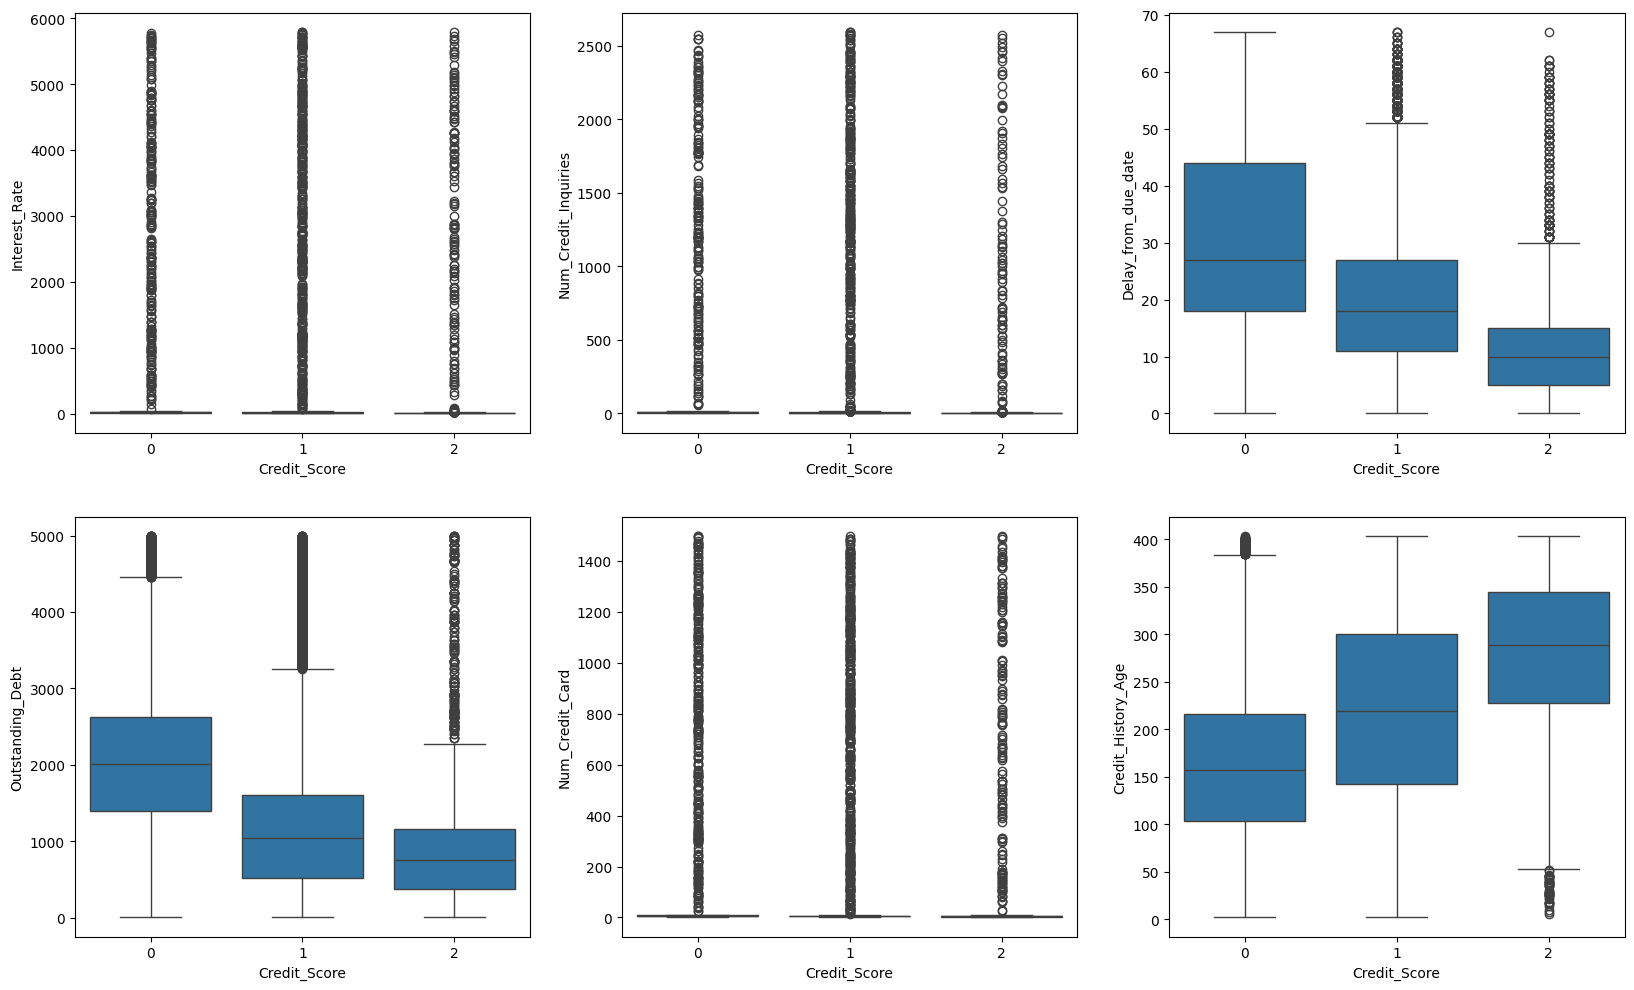

In [ ]:
f, (axes,axes2) = plt.subplots(ncols=3, figsize=(20,12),nrows=2)
# Correlations (Numerics)
sns.boxplot(x="Credit_Score", y="Interest_Rate", data=data_full, ax=axes[0])
sns.boxplot(x="Credit_Score", y="Num_Credit_Inquiries", data=data_full, ax=axes[1])
sns.boxplot(x="Credit_Score", y="Delay_from_due_date", data=data_full, ax=axes[2])
sns.boxplot(x="Credit_Score", y="Outstanding_Debt", data=data_full, ax=axes2[0])
sns.boxplot(x="Credit_Score", y="Num_Credit_Card", data=data_full, ax=axes2[1])
sns.boxplot(x="Credit_Score", y="Credit_History_Age", data=data_full, ax=axes2[2])


plt.show()

In [ ]:
from scipy.stats import norm
def plotdistforcol(var):
   f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

   sns.histplot(
       data=data_full[data_full["Credit_Score"] == 0],
       x=var,
       kde=True,  # Add kernel density estimate
       ax=ax1,
       color="#FB8861",
   )
   ax1.set_title(var + " Distribution \n (Poor)", fontsize=14)

   sns.histplot(
       data=data_full[data_full["Credit_Score"] == 1],
       x=var,
       kde=True,
       ax=ax2,
       color="#56F9BB",
   )
   ax2.set_title(var + " Distribution \n (Standard)", fontsize=14)

   sns.histplot(
       data=data_full[data_full["Credit_Score"] == 2],
       x=var,
       kde=True,
       ax=ax3,
       color="#C5B3F9",
   )
   ax3.set_title(var + " Distribution \n (Good)", fontsize=14)

   plt.show()

KeyboardInterrupt: 

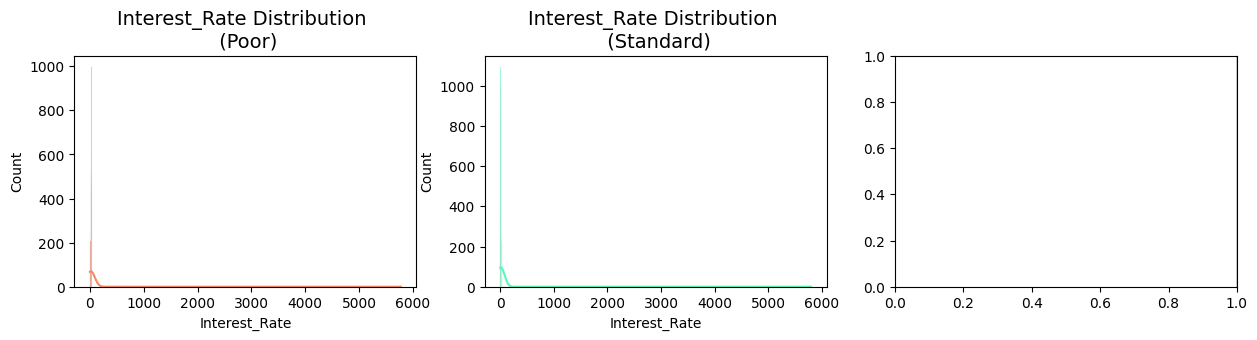

In [ ]:
plotdistforcol('Interest_Rate')

In [ ]:
plotdistforcol('Num_Credit_Inquiries')

In [ ]:
plotdistforcol('Delay_from_due_date')

In [ ]:
plotdistforcol('Outstanding_Debt')

In [ ]:
plotdistforcol('Num_Credit_Card')

In [ ]:
plotdistforcol("Credit_History_Age")

#1. data + model full data

##prepare full data + smote full data

In [ ]:
y = data_full["Credit_Score"]
x = data_full.drop("Credit_Score",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)
X_train2 = pd.DataFrame(scalar.transform(X_train),columns=x.columns)
X_test2 = pd.DataFrame(scalar.transform(X_test),columns=x.columns)

In [ ]:
normal_full = X_train2.copy()
normal_full['Credit_Score'] = y_train.values

##pycaret first run fulldata normal vs smote

###Find model

In [ ]:
s = setup(normal_full, target = 'Credit_Score', use_gpu=True)

In [ ]:
# functional API
best = compare_models()

### model with normal full data

In [ ]:
def train_test_model(col=[], method = 'None'):
    if len(col) != 0:
        X_sel_train = X_train.drop(col,axis=1)
        X_sel_test = X_test.drop(col,axis=1)
    else:
        X_sel_train = X_train.copy()
        X_sel_test = X_test.copy()
    print(X_sel_train.columns)
    if method == 'tomek':
        tl = TomekLinks(sampling_strategy='majority')
        X_sel_train, y_sel_train = tl.fit_resample(X_sel_train, y_train)
    elif method == 'smote':
        sm = SMOTE()
        X_sel_train, y_sel_train = sm.fit_resample(X_sel_train, y_train)
    elif method == 'tomek_smote':
        tl = TomekLinks(sampling_strategy='majority')
        X_sel_train, y_sel_train = tl.fit_resample(X_sel_train, y_train)
    else:
        y_sel_train = y_train.copy()
    print(Counter(y_sel_train))
    scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_sel_train)
    X_sel_train = pd.DataFrame(scalar.transform(X_sel_train),columns= X_sel_train.columns)
    X_sel_test = pd.DataFrame(scalar.transform(X_sel_test),columns= X_sel_train.columns)
    # Create the voting ensemble
    ensemble = VotingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(class_weight='balanced')),
        ("xgb", XGBClassifier(n_estimators=100)),
        ("et", ExtraTreesClassifier(class_weight='balanced'))
    ],
    voting="soft"  # Or "hard" voting
    )
    # Train and use the ensemble as before
    ensemble.fit(X_sel_train, y_sel_train)
    y_pred = ensemble.predict(X_sel_test)
    print(classification_report(y_test, y_pred,digits=5))

In [ ]:
train_test_model(col=[], method = 'None')

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Type_of_Loan_Auto Loan',
       'Type_of_Loan_Credit-Builder Loan',
       'Type_of_Loan_Debt Consolidation Loan', 'Type_of_Loan_Home Equity Loan',
       'Type_of_Loan_Mortgage Loan', 'Type_of_Loan_Not Specified',
       'Type_of_Loan_Payday Loan', 'Type_of_Loan_Personal Loan',
       'Type_of_Loan_Student Loan', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_MediaMana

ValueError: The estimator ExtraTreesRegressor should be a classifier.

### model with smote full data

In [ ]:
train_test_model(col=[], method = 'smote')

### model with tomeks link full data

In [ ]:
train_test_model(col=[], method = 'tomek')

### model with under + smote full data

In [ ]:
train_test_model(col=[], method = 'tomek_smote')

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Type_of_Loan_Auto Loan',
       'Type_of_Loan_Credit-Builder Loan',
       'Type_of_Loan_Debt Consolidation Loan', 'Type_of_Loan_Home Equity Loan',
       'Type_of_Loan_Mortgage Loan', 'Type_of_Loan_Not Specified',
       'Type_of_Loan_Payday Loan', 'Type_of_Loan_Personal Loan',
       'Type_of_Loan_Student Loan', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_MediaMana

ValueError: The estimator ExtraTreesRegressor should be a classifier.

#2. data + model Selected Feature

##model

### model with normal selected feature

In [ ]:
train_test_model(col=low_cor_col)

Index(['Age', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_History_Age',
       'Monthly_Balance', 'Type_of_Loan_Auto Loan',
       'Type_of_Loan_Credit-Builder Loan',
       'Type_of_Loan_Debt Consolidation Loan', 'Type_of_Loan_Home Equity Loan',
       'Type_of_Loan_Mortgage Loan', 'Type_of_Loan_Not Specified',
       'Type_of_Loan_Payday Loan', 'Type_of_Loan_Personal Loan',
       'Type_of_Loan_Student Loan', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'total_loan_type'],
      dtype='object')
Counter({1: 16736, 0: 9913, 2: 4898})
              precision    recall  f1-score   support

           0    0.77231   0.77885   0.77557      2478
           1    0.79008   0.78818   0.78913      4164
           2    0.71637   0.71004   0.71319      1245

    accuracy                        0.77292      7887
   macro a

### model with smote selected feature

In [ ]:
train_test_model(col=low_cor_col,method='smote')

Index(['Age', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_History_Age',
       'Monthly_Balance', 'Type_of_Loan_Auto Loan',
       'Type_of_Loan_Credit-Builder Loan',
       'Type_of_Loan_Debt Consolidation Loan', 'Type_of_Loan_Home Equity Loan',
       'Type_of_Loan_Mortgage Loan', 'Type_of_Loan_Not Specified',
       'Type_of_Loan_Payday Loan', 'Type_of_Loan_Personal Loan',
       'Type_of_Loan_Student Loan', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'total_loan_type'],
      dtype='object')
Counter({2: 16736, 0: 16736, 1: 16736})
              precision    recall  f1-score   support

           0    0.76043   0.80186   0.78059      2478
           1    0.81073   0.75504   0.78190      4164
           2    0.67049   0.75181   0.70882      1245

    accuracy                        0.76924      7887
   macro

### model with tomeks link selected feature

In [ ]:
train_test_model(col=low_cor_col,method='tomek')

Index(['Age', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_History_Age',
       'Monthly_Balance', 'Type_of_Loan_Auto Loan',
       'Type_of_Loan_Credit-Builder Loan',
       'Type_of_Loan_Debt Consolidation Loan', 'Type_of_Loan_Home Equity Loan',
       'Type_of_Loan_Mortgage Loan', 'Type_of_Loan_Not Specified',
       'Type_of_Loan_Payday Loan', 'Type_of_Loan_Personal Loan',
       'Type_of_Loan_Student Loan', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'total_loan_type'],
      dtype='object')
Counter({1: 14101, 0: 9913, 2: 4898})
              precision    recall  f1-score   support

           0    0.75307   0.84181   0.79497      2478
           1    0.83707   0.74400   0.78779      4164
           2    0.68362   0.77751   0.72755      1245

    accuracy                        0.78002      7887
   macro a

### model with tomeks link + smote selected feature

In [ ]:
train_test_model(col=low_cor_col,method='tomek_smote')

Index(['Age', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_History_Age',
       'Monthly_Balance', 'Type_of_Loan_Auto Loan',
       'Type_of_Loan_Credit-Builder Loan',
       'Type_of_Loan_Debt Consolidation Loan', 'Type_of_Loan_Home Equity Loan',
       'Type_of_Loan_Mortgage Loan', 'Type_of_Loan_Not Specified',
       'Type_of_Loan_Payday Loan', 'Type_of_Loan_Personal Loan',
       'Type_of_Loan_Student Loan', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'total_loan_type'],
      dtype='object')
Counter({1: 14101, 0: 9913, 2: 4898})
              precision    recall  f1-score   support

           0    0.75388   0.84302   0.79596      2478
           1    0.83563   0.74232   0.78621      4164
           2    0.68243   0.77671   0.72652      1245

    accuracy                        0.77938      7887
   macro a

#3.ML with other data

##No feature engineering

In [ ]:
feature_engineering = X_train.columns[53:56]
feature_engineering

In [ ]:
train_test_model(feature_engineering,'tomek')

In [ ]:
train_test_model(feature_engineering.union(low_cor_col),'tomek')

##No Occupation

In [ ]:
occupation = X_train.columns[26:42]
train_test_model(occupation,'tomek')

##No Occupation and No Feature Engineering

In [ ]:
feature_engineering.union(occupation)

In [ ]:
train_test_model(feature_engineering.union(occupation),'tomek')

##No corr < 1 and No Feature Engineering

In [ ]:
train_test_model(feature_engineering.union(low_cor_col),'tomek')

##Selected feature_engineering

In [ ]:
feature_engineering

In [ ]:
train_test_model(feature_engineering[0:1].union(low_cor_col),'tomek')

In [ ]:
train_test_model(feature_engineering[1:2].union(low_cor_col),'tomek')

In [ ]:
train_test_model(feature_engineering[2:].union(low_cor_col),'tomek')

In [ ]:
train_test_model(feature_engineering[1:].union(low_cor_col),'tomek')

#Finetune parameters

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
col = feature_engineering[1:].union(low_cor_col)
if len(col) != 0:
    X_sel_train = X_train.drop(col,axis=1)
    X_sel_test = X_test.drop(col,axis=1)
else:
    X_sel_train = X_train.copy()
    X_sel_test = X_test.copy()
print(X_sel_train.columns)
tl = TomekLinks(sampling_strategy='majority')
X_sel_train, y_sel_train = tl.fit_resample(X_sel_train, y_train)
print(Counter(y_sel_train))
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_sel_train)
X_sel_train = pd.DataFrame(scalar.transform(X_sel_train),columns= X_sel_train.columns)
X_sel_test = pd.DataFrame(scalar.transform(X_sel_test),columns= X_sel_train.columns)
#params
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 8, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

et_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 8, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
# Create the voting ensemble
# Grid Search
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
et_grid = GridSearchCV(ExtraTreesClassifier(), et_params, cv=5)
xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5)

rf_grid.fit(X_train, y_train)
et_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

rf_best_params = rf_grid.best_params_
rf_best_score = rf_grid.best_score_

et_best_params = et_grid.best_params_
et_best_score = et_grid.best_score_

xgb_best_params = xgb_grid.best_params_
xgb_best_score = xgb_grid.best_score_

In [ ]:
print(rf_best_params,rf_best_score)
print(et_best_params,et_best_score)
print(xgb_best_params,xgb_best_score)